# Анализ данных рекламы в социальных сетях.

Нам нужно проанализировать данные рекламы в социальных сетях.

-   Первый этап - изучение общий информации.
-   Второй этап - предобработка данных.
-   Третий этап - анализ данных.
-   Четвертый этап - общий вывод. 

Среди данных у нас есть возраст, ориентировочная зарплата, купли или нет товар.

## Изучение общий информации.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv("C:\\Users\\User\\Documents\\Phyton\\Social_Network_Ads.csv")
except: 
    data = pd.read_csv('C:\\Users\\User\\Desktop\\Social_Network_Ads.csv')
  
data.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [3]:
data=data.rename(columns={'EstimatedSalary' : 'estimated_salary', 'Age' : 'age', 'Purchased' : 'purchased'})

In [4]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               400 non-null    int64
 1   estimated_salary  400 non-null    int64
 2   purchased         400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
try:
    data_corr = pd.read_csv("C:\\Users\\User\\Documents\\Phyton\\Social_Network_Ads.csv")
except: 
    data_corr = pd.read_csv('C:\\Users\\User\\Desktop\\Social_Network_Ads.csv')
    
data_corr=data.rename(columns={'EstimatedSalary' : 'estimated_salary', 'Age' : 'age', 'Purchased' : 'purchased'})

## Предобработка данных.

Проверим данные на наличие пропущенных значений. Оценим объем пропущенных данных и решим, как их обработать если это потребуется.

In [6]:
print(data.isna().sum());

age                 0
estimated_salary    0
purchased           0
dtype: int64


Пропусков нет.

Оценим качество данных, проверим наличие выбросов или необычных значений, проверим данные на аномалии.

Минимальный возраст: 18
Максимальный возраст: 60


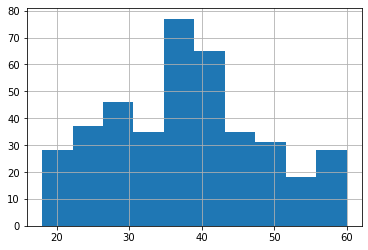

In [7]:
data['age'].hist()
print('Минимальный возраст:',data['age'].min())
print('Максимальный возраст:',data['age'].max())

Минимальная зарплата: 15000
Минимальная зарплата: 150000


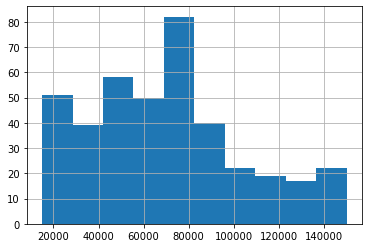

In [8]:
data['estimated_salary'].hist()
print('Минимальная зарплата:', data['estimated_salary'].min())
print('Минимальная зарплата:', data['estimated_salary'].max())

[0 1]


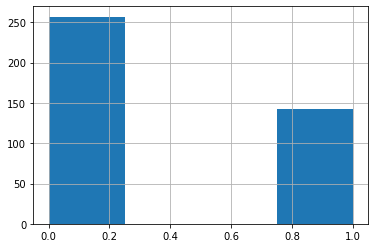

In [9]:
print(data['purchased'].unique());
data['purchased'].hist(bins=4);

Аномалий в данных нет.

Проведем анализ дубликатов в данных.

In [10]:
print('Количество дубликатов:', data.duplicated().sum());

Количество дубликатов: 33


In [11]:
x = (data.duplicated().sum()) * 33 / (len(data))
print('Процент дубликатов от общего числа:', x.round(1),'%')

Процент дубликатов от общего числа: 2.7 %


Удалим дубликаты.

In [12]:
data=data.drop_duplicates()

In [13]:
print('Количество дубликатов:', data.duplicated().sum());

Количество дубликатов: 0


Сделаем данные некоторых категорий более понятными, заменим в колонке Purchased нули и единицы на подходящие текстовые категории.

In [14]:
data['purchased'] = data['purchased'].apply(lambda x: 'покупка' if x == 1 else 'не куплено')

In [15]:
data.head(10)

,age,estimated_salary,purchased
0,19,19000,не куплено
1,35,20000,не куплено
2,26,43000,не куплено
3,27,57000,не куплено
4,19,76000,не куплено
5,27,58000,не куплено
6,27,84000,не куплено
7,32,150000,покупка
8,25,33000,не куплено
9,35,65000,не куплено


## Анализ данных.

Посмотрим медианную зарплату  и распределение количества клиент по возрастам.

In [16]:
data_pivot = data.pivot_table(index='age', values='estimated_salary', aggfunc='median')
data_count_01 = data.pivot_table(index='age', values='estimated_salary', aggfunc='count').reset_index()
#x = data_count_01['estimated_salary'].sum()

In [17]:
data_pivot.head(10)

,estimated_salary
age,
18,68000
19,26000
20,61500
21,70000
22,55000
23,55500
24,43500
25,79500
26,47500


In [18]:
data_count_01.head(10)

,age,estimated_salary
0,18,5
1,19,7
2,20,6
3,21,4
4,22,5
5,23,6
6,24,8
7,25,6
8,26,14
9,27,12


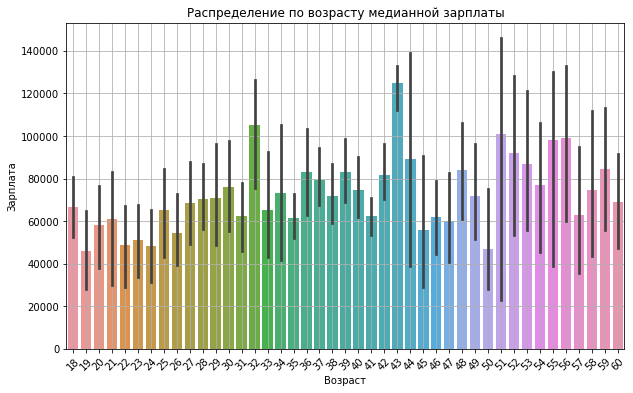

In [19]:
sns.barplot(x = data['age'], y = data['estimated_salary'])
plt.xticks(rotation=45)
plt.grid()
plt.gcf().set_size_inches(10, 6)
plt.title('Распределение по возрасту медианной зарплаты')
plt.xlabel('Возраст')
plt.ylabel('Зарплата');

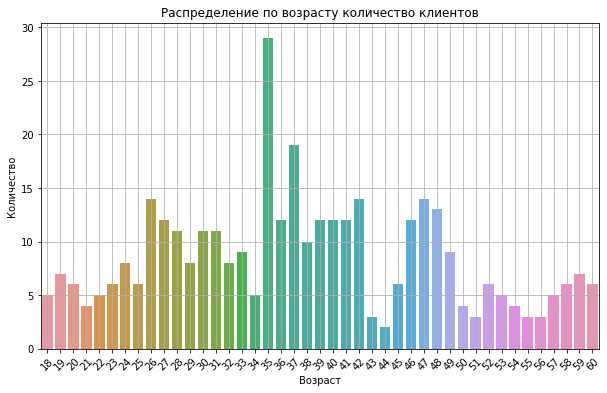

In [20]:
sns.barplot(x = data_count_01['age'], y = data_count_01['estimated_salary'])
plt.xticks(rotation=45)
plt.grid()
plt.gcf().set_size_inches(10, 6)
plt.title('Распределение по возрасту количество клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество');

Разделим на категории для удобства возраста. Разобьем их на три категории молодые, средний возраст, возрастные 

In [21]:
def categorize(income):
    try:
        if 17 <= income <= 32:
            return 'молодой'
        elif 33 <= income <= 42:
            return 'средний возраст'
        elif  income >= 43:
            return 'возрастной'
    except:
        pass
data['category_age'] = data['age'].apply(categorize)        

In [22]:
data.head(10)
#data['category_age'].count()

#check = data.groupby(['category_age'],as_index = False)[['age']].count()
#check

,age,estimated_salary,purchased,category_age
0,19,19000,не куплено,молодой
1,35,20000,не куплено,средний возраст
2,26,43000,не куплено,молодой
3,27,57000,не куплено,молодой
4,19,76000,не куплено,молодой
5,27,58000,не куплено,молодой
6,27,84000,не куплено,молодой
7,32,150000,покупка,молодой
8,25,33000,не куплено,молодой
9,35,65000,не куплено,средний возраст


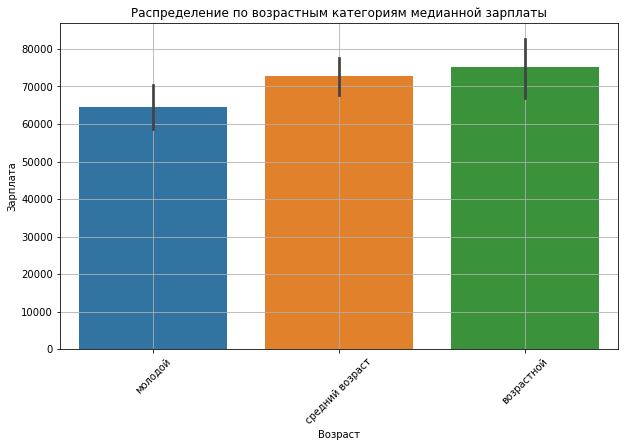

In [23]:
sns.barplot(x = data['category_age'], y = data['estimated_salary'])
plt.xticks(rotation=45)
plt.grid()
plt.gcf().set_size_inches(10, 6)
plt.title('Распределение по возрастным категориям медианной зарплаты')
plt.xlabel('Возраст')
plt.ylabel('Зарплата');

Медийная заработная плата потенциальных клиентов повышается с возрастом. 

Посмотрим распределение среди клиентов которые покупают рекламированный товар и тех что не покупают.

In [24]:
group_data = data.groupby(['category_age', 'purchased'], \
                       as_index = False)[['age']].count().sort_values(by='category_age', ascending=False)

In [25]:
group_data

,category_age,purchased,age
4,средний возраст,не куплено,101
5,средний возраст,покупка,33
2,молодой,не куплено,110
3,молодой,покупка,12
0,возрастной,не куплено,18
1,возрастной,покупка,93


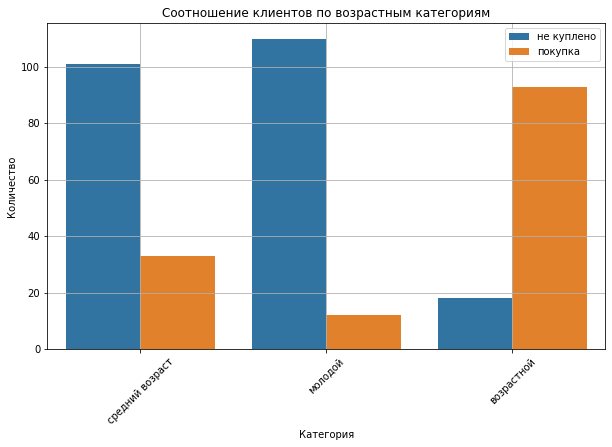

In [26]:
sns.barplot(data=group_data, x='category_age', y='age', hue='purchased')
plt.xticks(rotation=45)
plt.grid()
plt.legend(fontsize=10)
plt.gcf().set_size_inches(10, 6)
plt.title('Соотношение клиентов по возрастным категориям')
plt.xlabel('Категория')
plt.ylabel('Количество');

Здесь можно увидеть  что чем более возрастной клиент тем больше вероятность что он приобретет товар. 

In [27]:
group_salary = data.groupby(['category_age', 'purchased'], \
                       as_index = False)[['estimated_salary']].median()

In [28]:
group_salary

,category_age,purchased,estimated_salary
0,возрастной,не куплено,74000.0
1,возрастной,покупка,74000.0
2,молодой,не куплено,61500.0
3,молодой,покупка,121500.0
4,средний возраст,не куплено,60000.0
5,средний возраст,покупка,107000.0


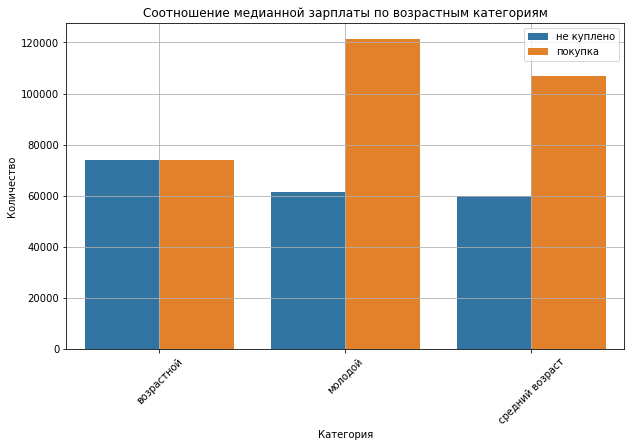

In [29]:
sns.barplot(data=group_salary, x='category_age', y='estimated_salary', hue='purchased')
plt.xticks(rotation=45)
plt.grid()
plt.legend(fontsize=10)
plt.gcf().set_size_inches(10, 6)
plt.title('Соотношение медианной зарплаты по возрастным категориям')
plt.xlabel('Категория')
plt.ylabel('Количество');

Зарплата сильно влияет на молодой и средний возраст, но у возрастных клиентов разнице в медийной заработанной плате в категории купивших и не купивших разницы нет. 

Разобьем заработанную плату на три категории:
- A - до 50000; 
- B - от 50001 до 80000; 
- C - от 80001.

In [30]:
def estimated_income(income):
    try:
        if 0 <= income <= 50000:
            return 'A'
        elif 50001 <= income <= 80000:
            return 'B'
        elif income >= 80001:
            return 'C'
    except:
        pass

In [31]:
data['estimated_category'] = data['estimated_salary'].apply(estimated_income)
data.head()

,age,estimated_salary,purchased,category_age,estimated_category
0,19,19000,не куплено,молодой,A
1,35,20000,не куплено,средний возраст,A
2,26,43000,не куплено,молодой,A
3,27,57000,не куплено,молодой,B
4,19,76000,не куплено,молодой,B


In [32]:
estimated = (data.pivot_table(index=['estimated_category', 'purchased'], values='age', aggfunc='count')
              .sort_values(by='purchased', ascending=False)
              .reset_index()
             )

estimated

,estimated_category,purchased,age
0,A,покупка,40
1,B,покупка,16
2,C,покупка,82
3,A,не куплено,73
4,B,не куплено,113
5,C,не куплено,43


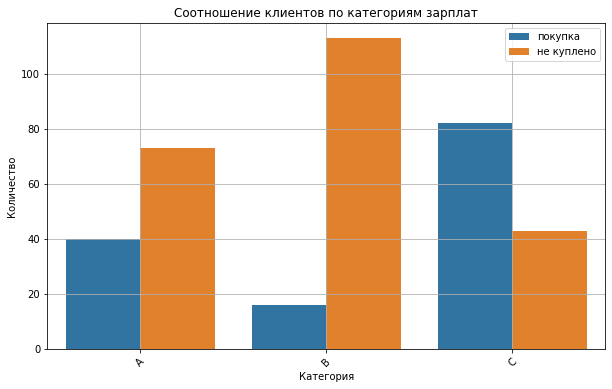

In [33]:
sns.barplot(data=estimated, x='estimated_category', y='age', hue='purchased')
plt.xticks(rotation=45)
plt.grid()
plt.legend(fontsize=10)
plt.gcf().set_size_inches(10, 6)
plt.title('Соотношение клиентов по категориям зарплат')
plt.xlabel('Категория')
plt.ylabel('Количество');

В категории "B" есть явная просадка по клиентам, а в категории "С" идет резкий подъем и количество купивших превышает категории не купивших товар.  

Посмотрим на корреляцию данных.

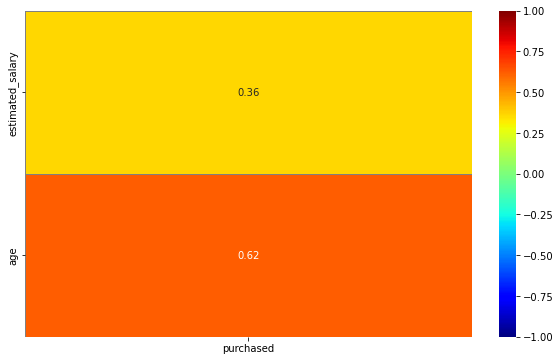

In [34]:
(sns.heatmap(data_corr.corr().loc[:,['purchased']].drop('purchased')
             .sort_values('purchased')
             ,annot=True, vmin=-1, vmax=1, center= 0, cmap= 'jet', linewidths=1, linecolor='grey'))
plt.gcf().set_size_inches(10, 6)
plt.show()

На тепловой карте видно что и зарплата и возраст коррелируют с количеством покупок продуктов, но возраст имеет большое влияние. 

## Вывод.

По данным анализа можна подвести итоги:

- Чем более возрастной клиент тем больше вероятность что он приобретет товар. 
- Зарплата сильно влияет на молодой и средний возраст, но у возрастных клиентов разнице в медийной заработанной плате в категории купивших и не купивших нет. 
- У клиентов с доходом от 50001 до 80000 есть явная просадка по клиентам там покупают меньше чем люди с доходом меньше 50000, а у клиентов с доходом выше 80000 идет резкий подъем и количество купивших превышает категории не купивших товар в отличии от людей с более низкими доходами. 
- Доходы клиентов и возраст коррелируют с покупками после рекламы в социальных сетях, но возраст имеет большее значение. 